## 1.Import Requirements

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
#ignire the warning
import warnings
warnings.filterwarnings('ignore')

## 2. Load the Data

In [2]:
#train_data
train_data = pd.read_csv("titanic_data.csv")

## 3. Summary Report

In [3]:
#shape
train_data.shape

(889, 15)

In [4]:
train_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
#stat of the data
stat_data = train_data.describe().T

In [6]:
stat_data

,count,mean,std,min,25%,50%,75%,max
survived,889.0,0.384702,0.486799,0.00,0.000,0.0000,1.0,1.0000
pclass,889.0,2.307087,0.836367,1.00,2.000,3.0000,3.0,3.0000
age,713.0,29.698696,14.536691,0.42,20.000,28.0000,38.0,80.0000
sibsp,889.0,0.523060,1.103729,0.00,0.000,0.0000,1.0,8.0000
parch,889.0,0.382452,0.806761,0.00,0.000,0.0000,0.0,6.0000
fare,889.0,32.259059,49.735870,0.00,7.925,14.4542,31.0,512.3292


In [7]:
# find the data types
train_data.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [8]:
#null value

train_data.isnull().sum()

survived         0
pclass           0
sex              0
age            176
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           686
embark_town      2
alive            0
alone            0
dtype: int64

## 4 Data Visualization

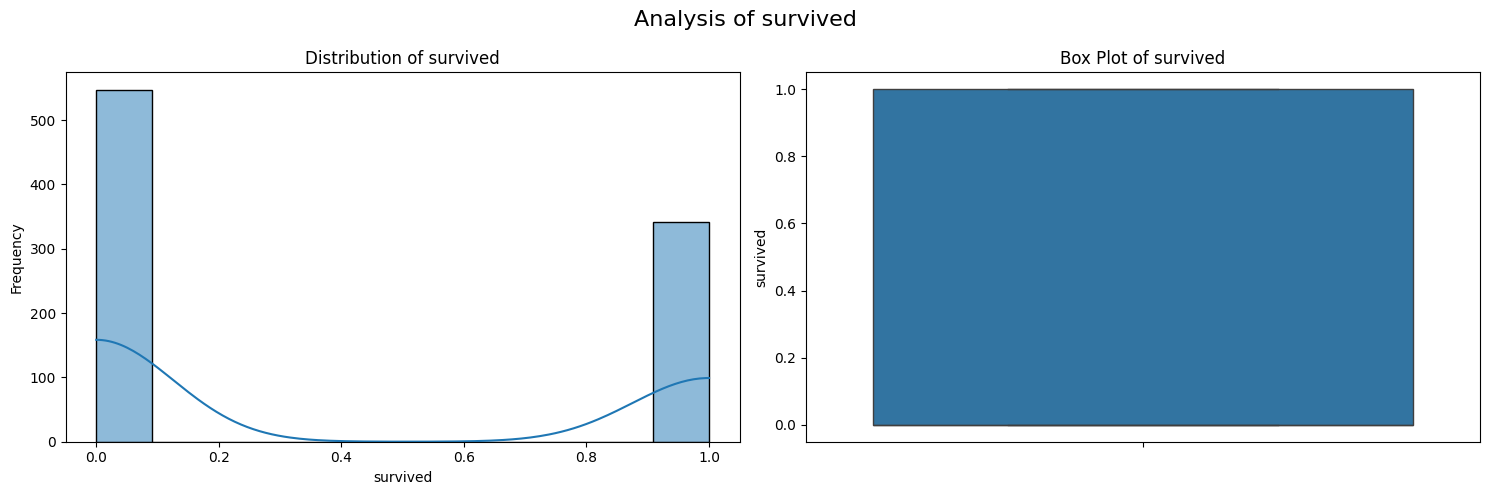

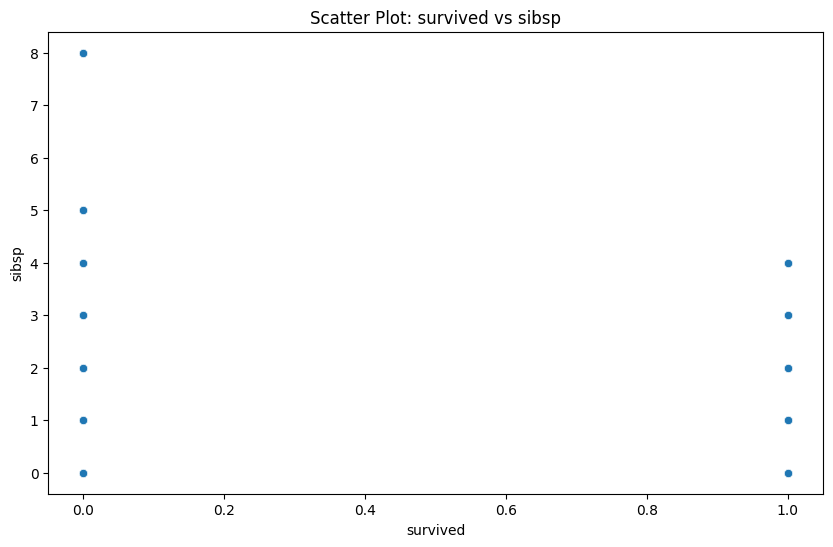

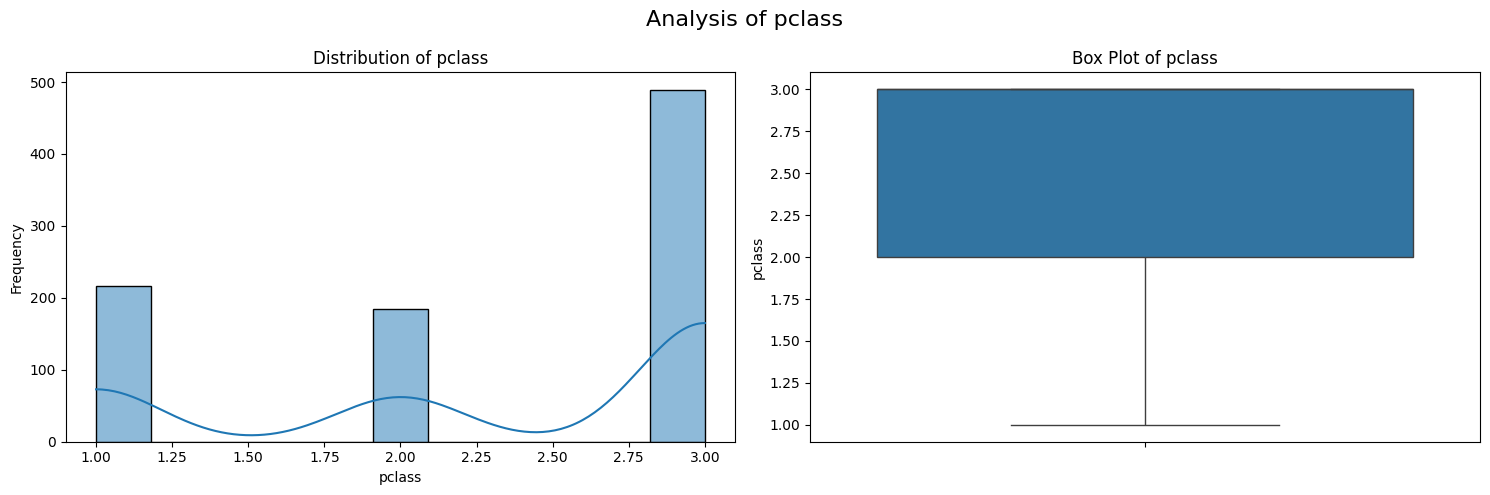

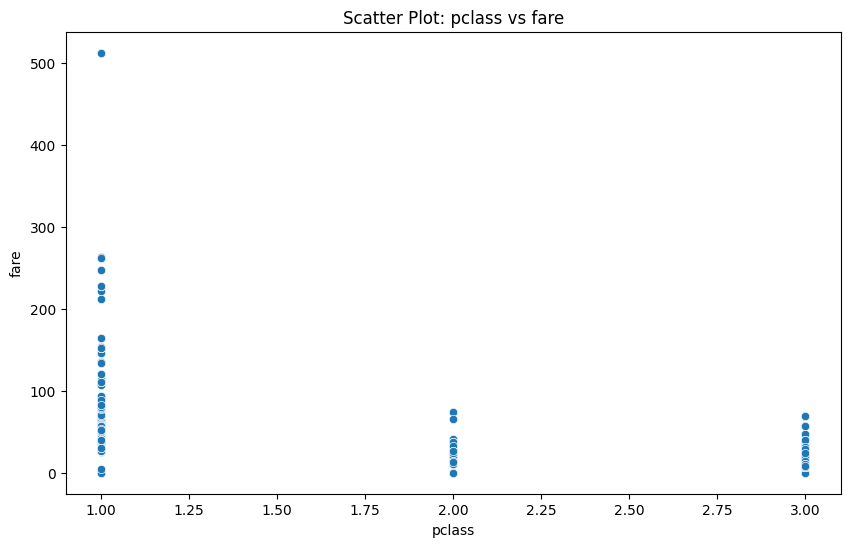

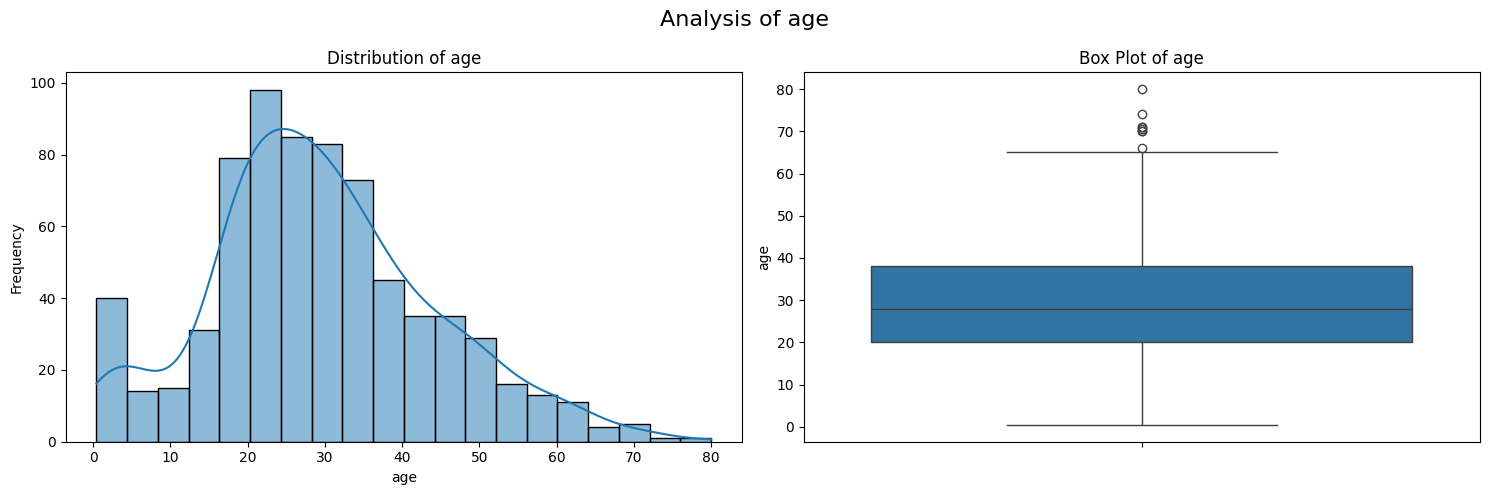

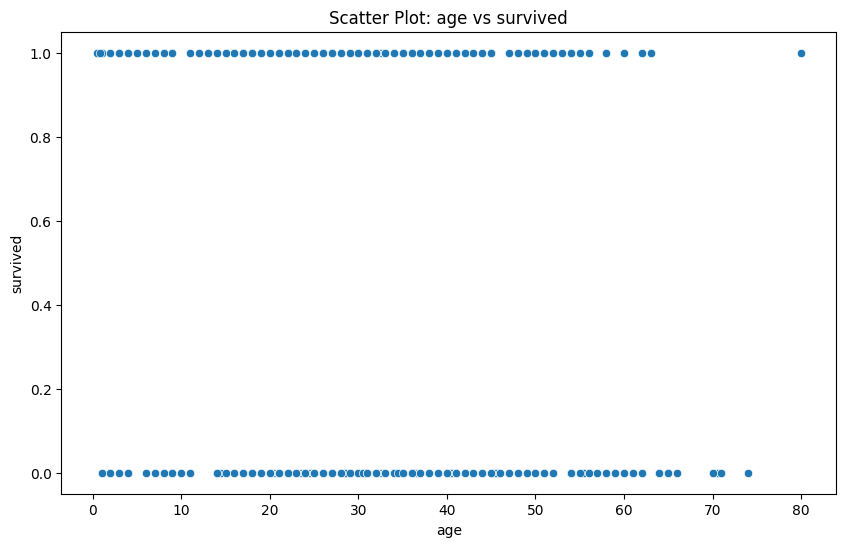

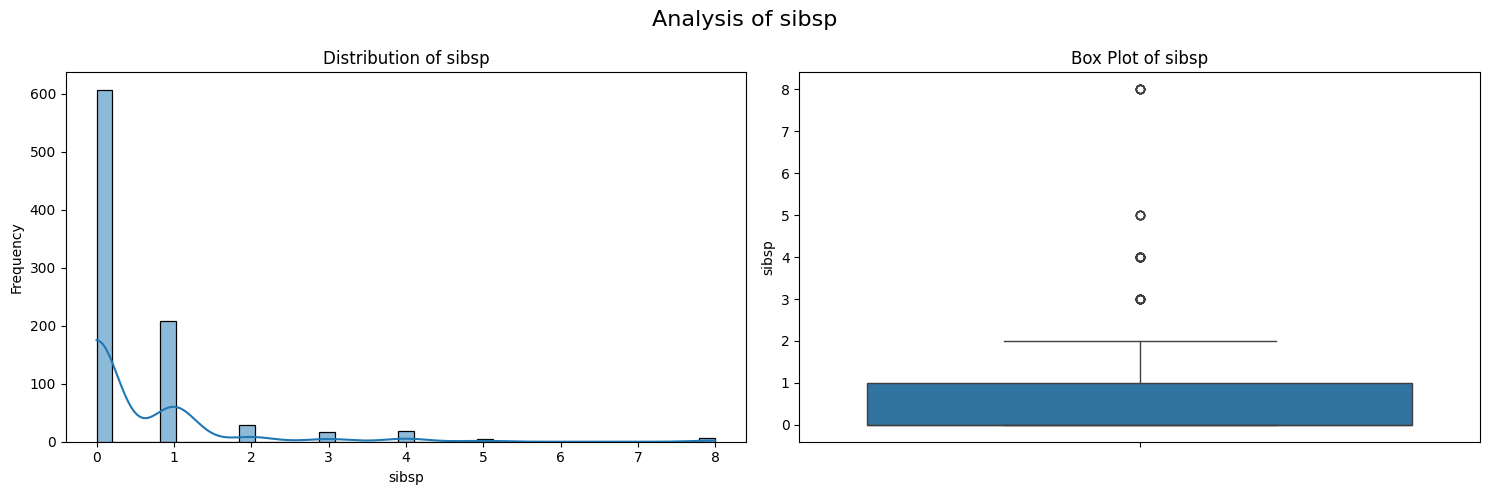

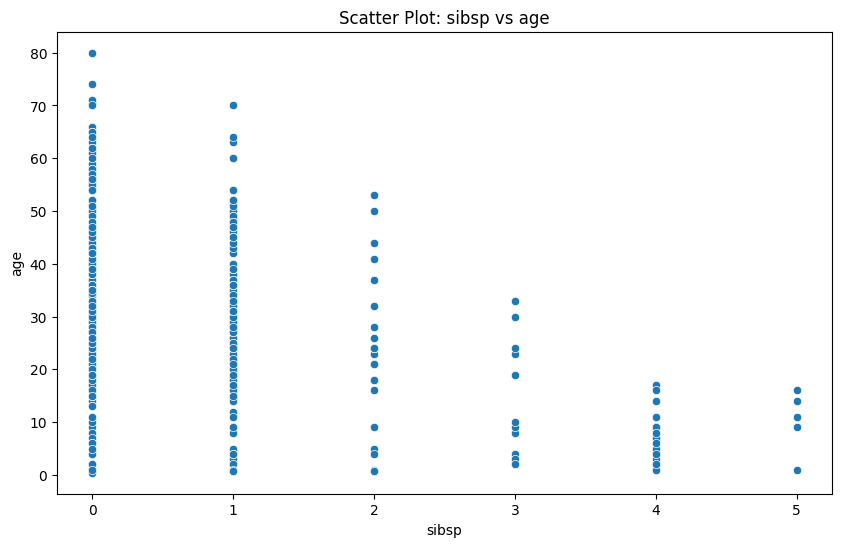

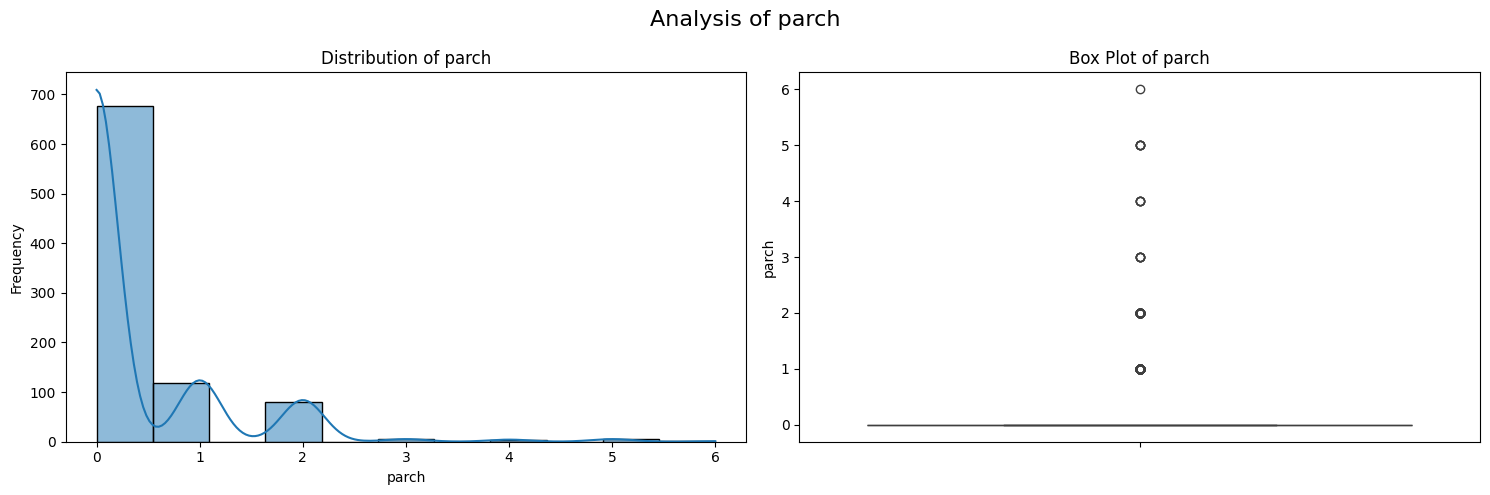

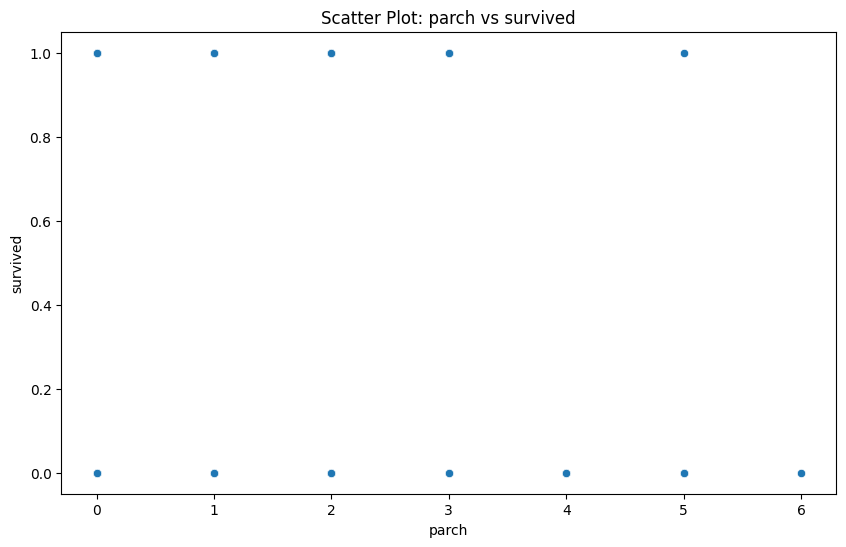

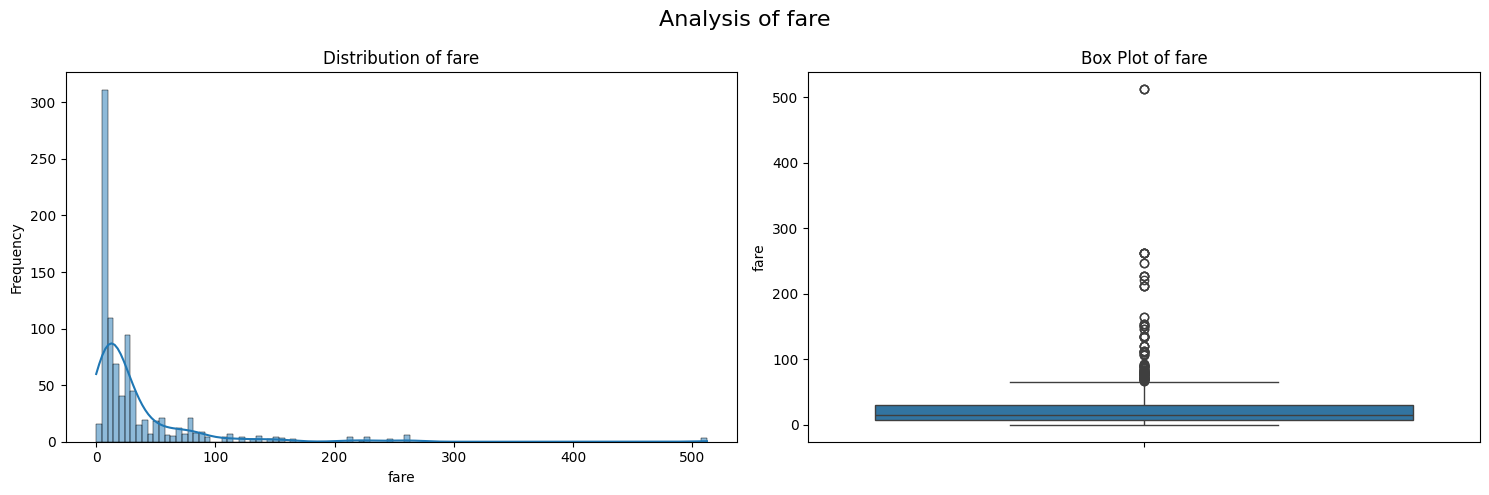

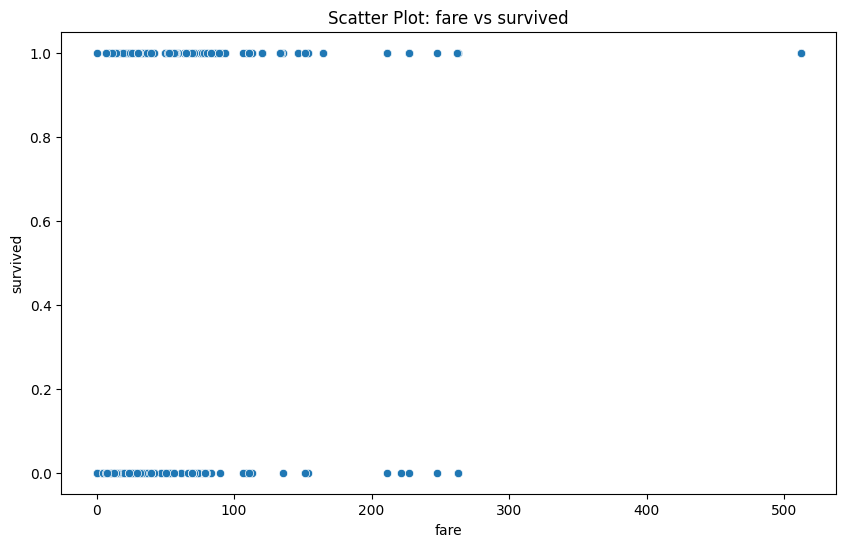

In [13]:
#Visualiza the data
int_columns = train_data.select_dtypes(include=[np.int64, np.float64,np.number]).columns
df = train_data.copy()
# Set up the plot style


for column in int_columns:
    # Create a figure with 2 subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(f'Analysis of {column}', fontsize=16)

    # Histogram
    sns.histplot(data=df, x=column, kde=True, ax=ax1)
    ax1.set_title(f'Distribution of {column}')
    ax1.set_xlabel(column)
    ax1.set_ylabel('Frequency')

    # Box plot
    sns.boxplot(data=df, y=column, ax=ax2)
    ax2.set_title(f'Box Plot of {column}')
    ax2.set_ylabel(column)

    plt.tight_layout()
    plt.show()

    # Scatter plot with another random integer column (if available)
    other_int_columns = [col for col in int_columns if col != column]
    if other_int_columns:
        other_column = np.random.choice(other_int_columns)
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x=column, y=other_column)
        plt.title(f'Scatter Plot: {column} vs {other_column}')
        plt.xlabel(column)
        plt.ylabel(other_column)
        plt.show()

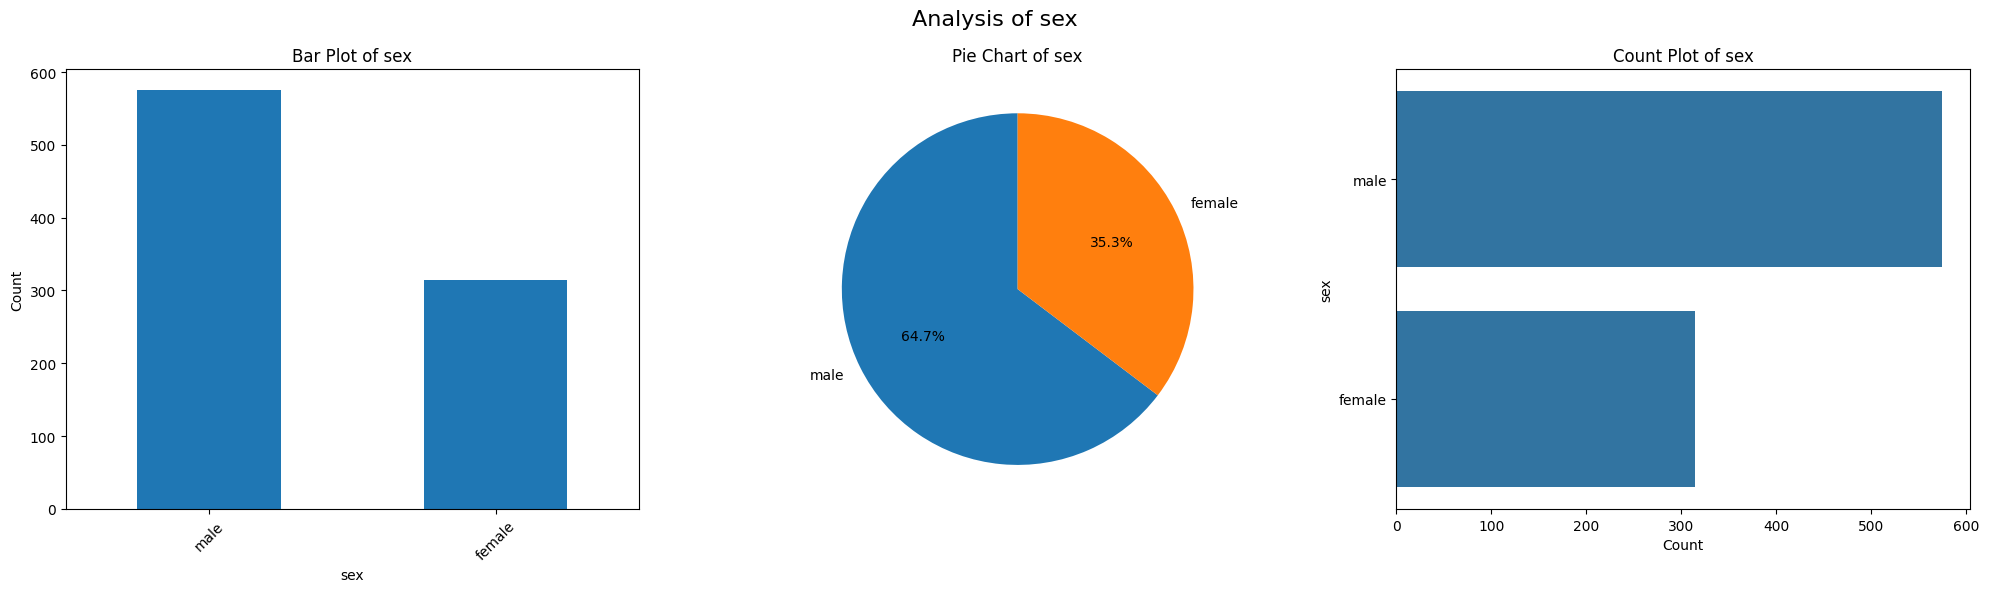

<Figure size 1200x600 with 0 Axes>

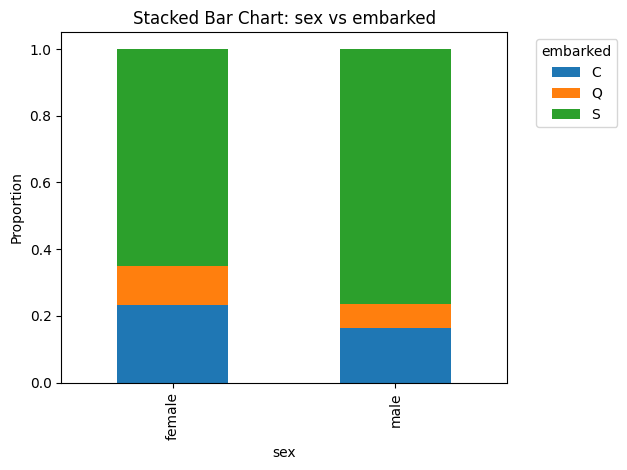

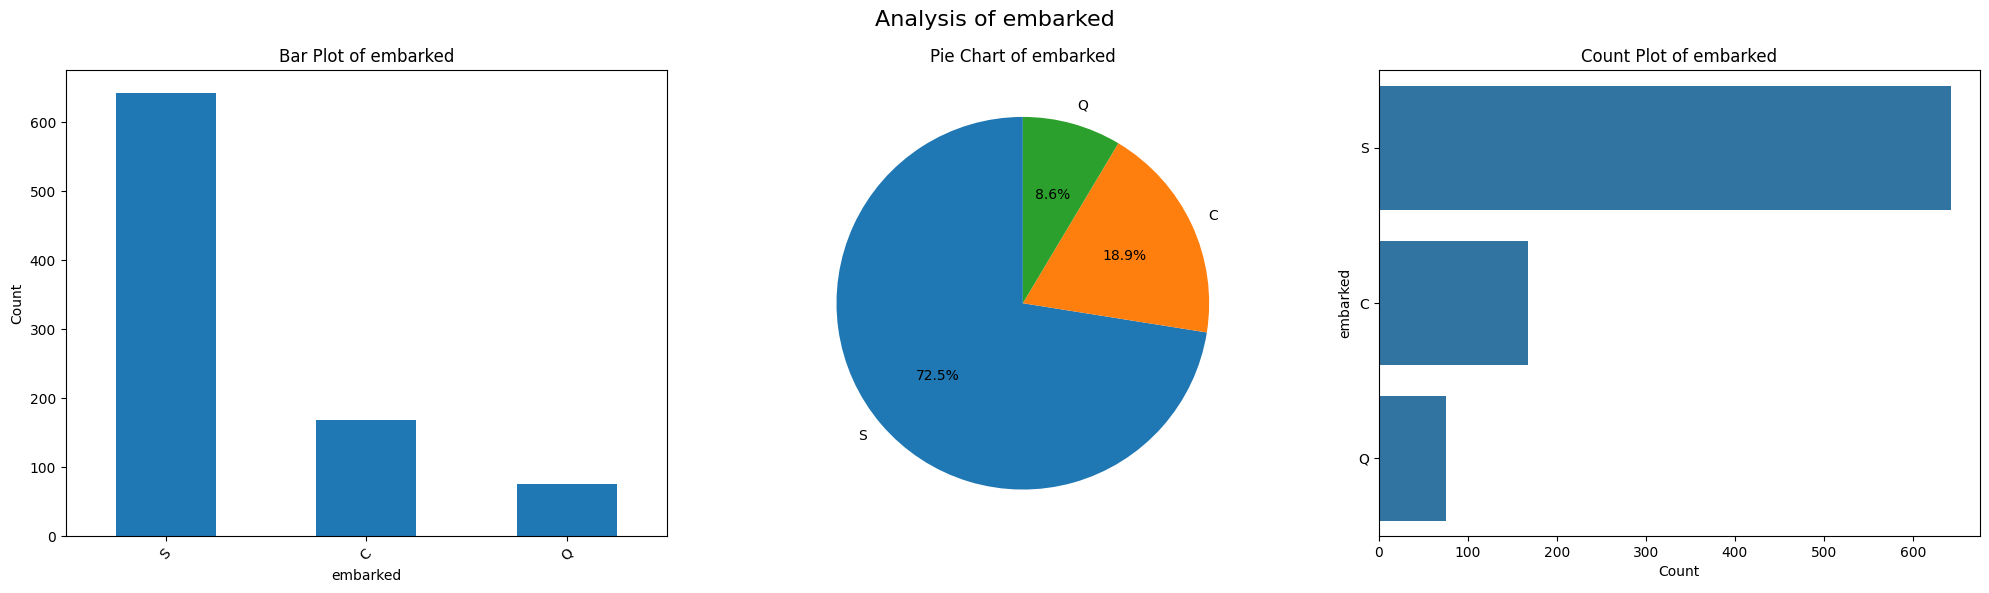

<Figure size 1200x600 with 0 Axes>

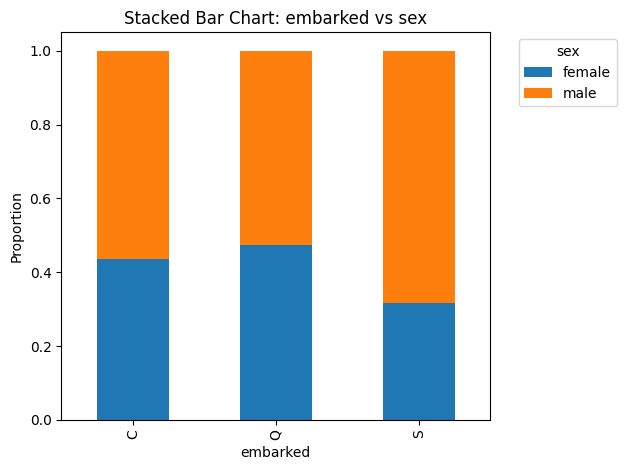

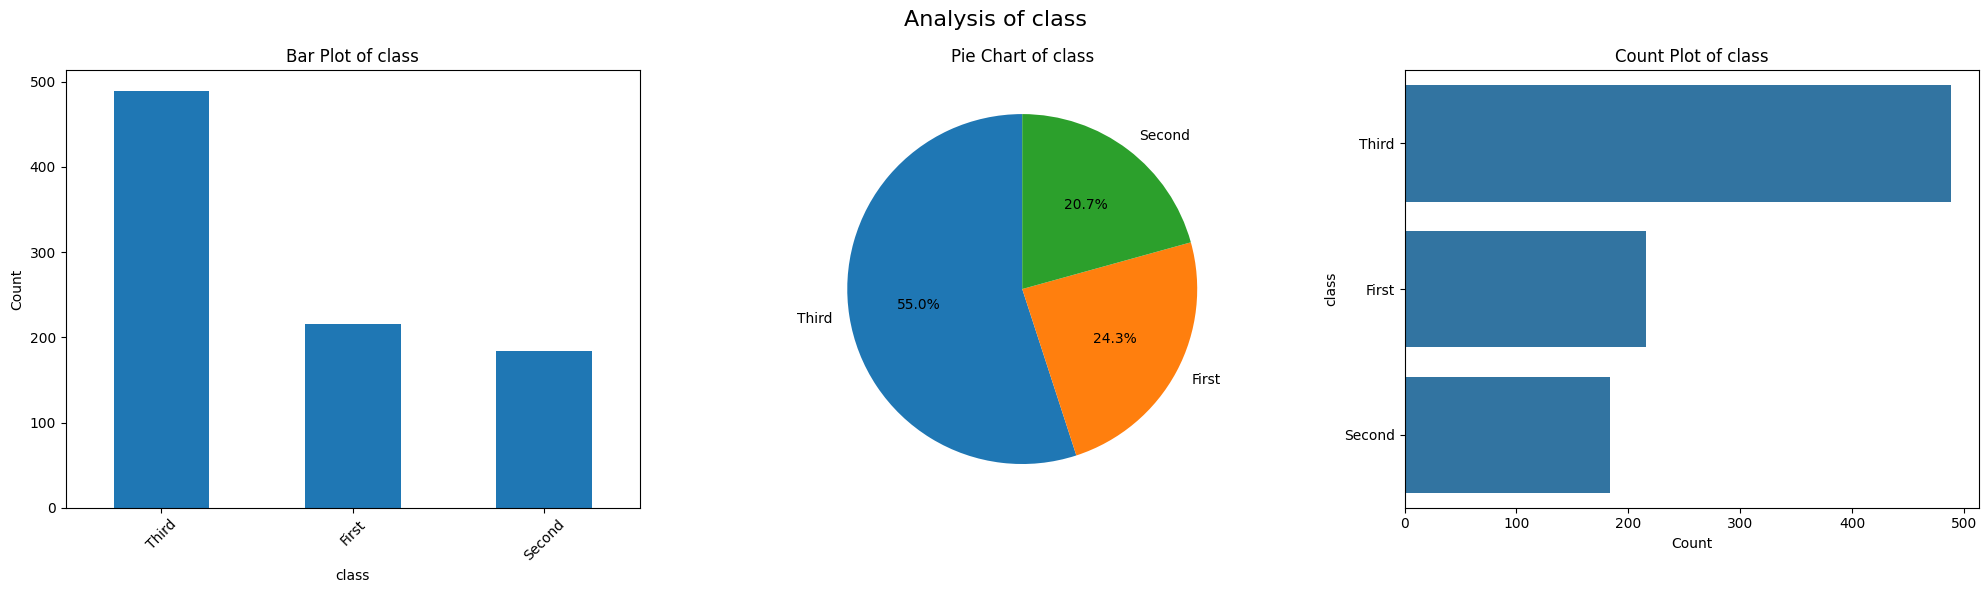

<Figure size 1200x600 with 0 Axes>

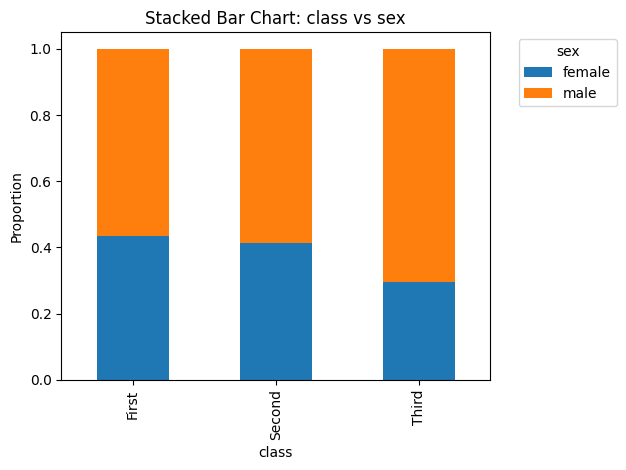

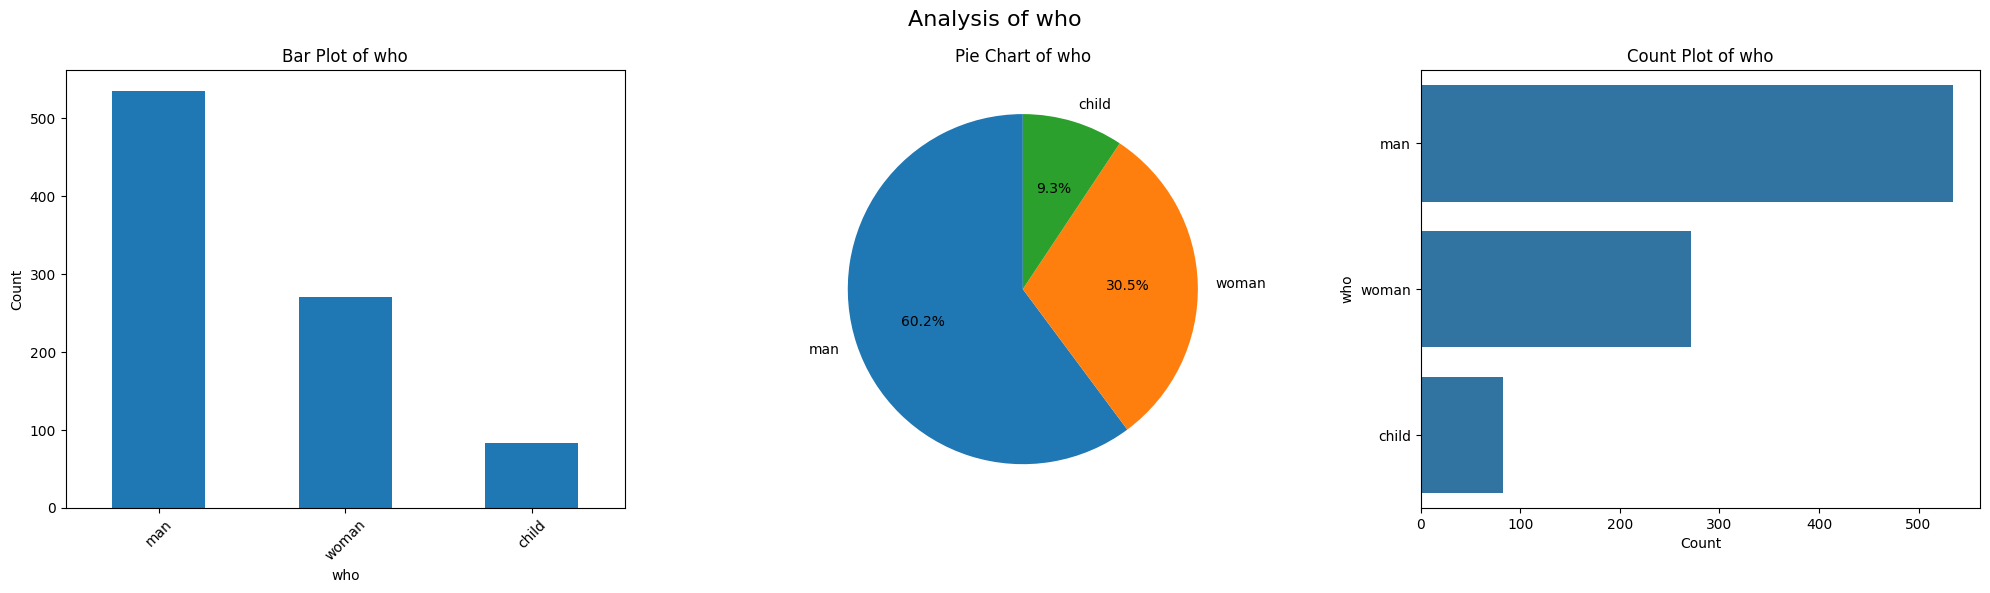

<Figure size 1200x600 with 0 Axes>

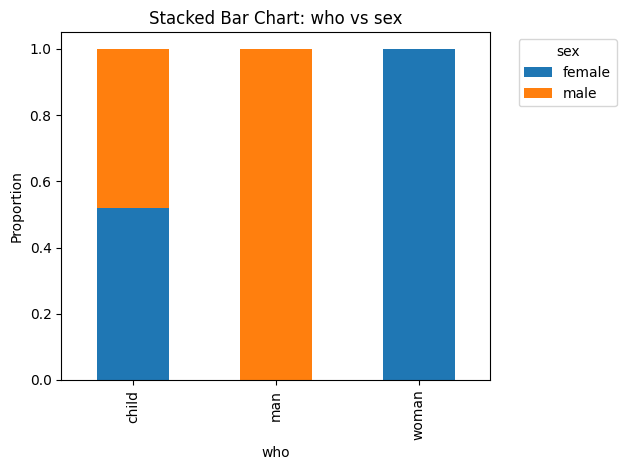

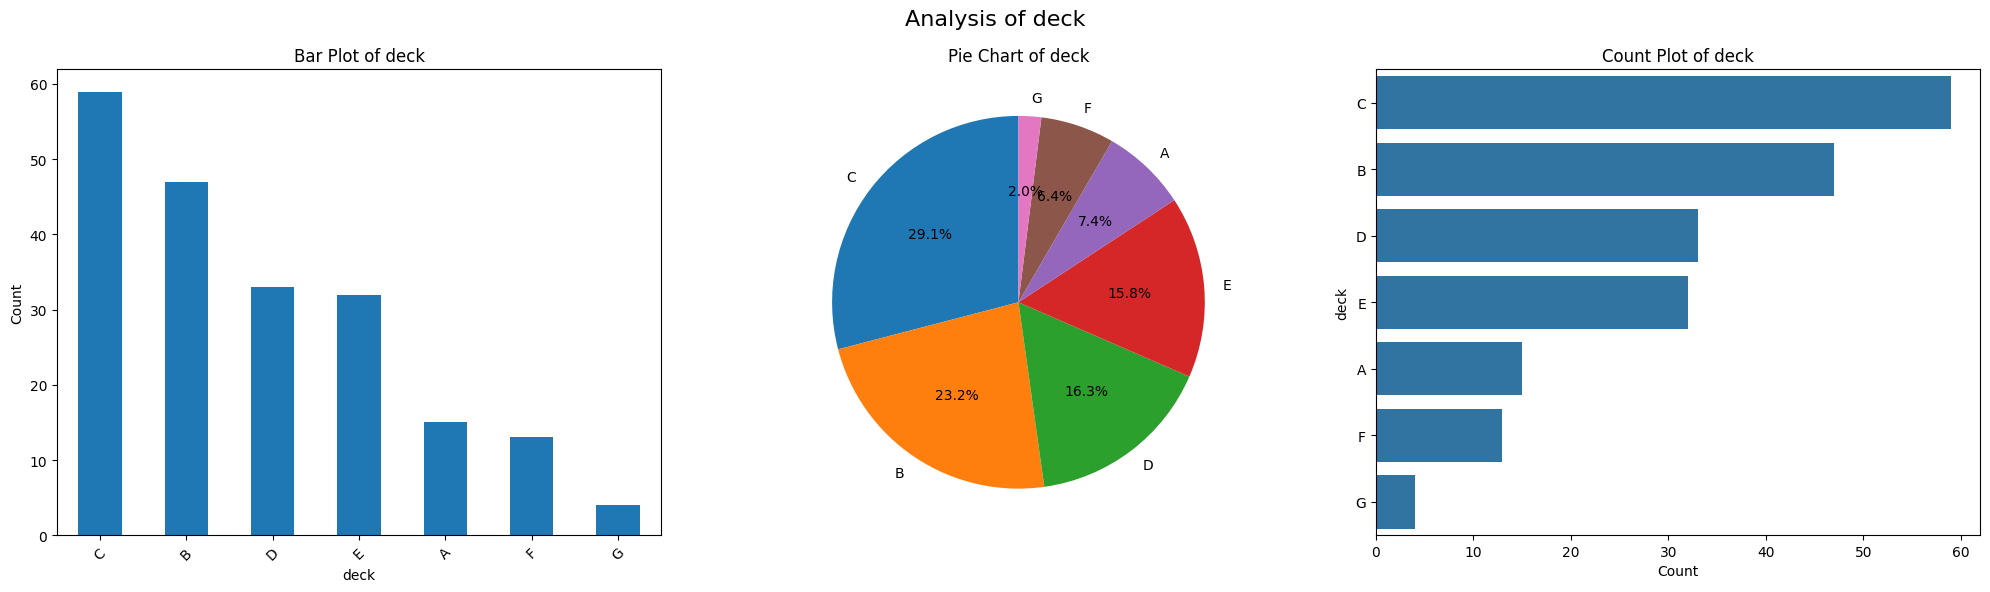

<Figure size 1200x600 with 0 Axes>

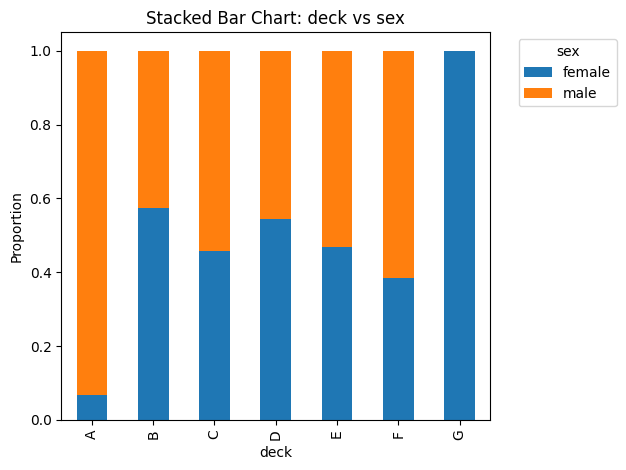

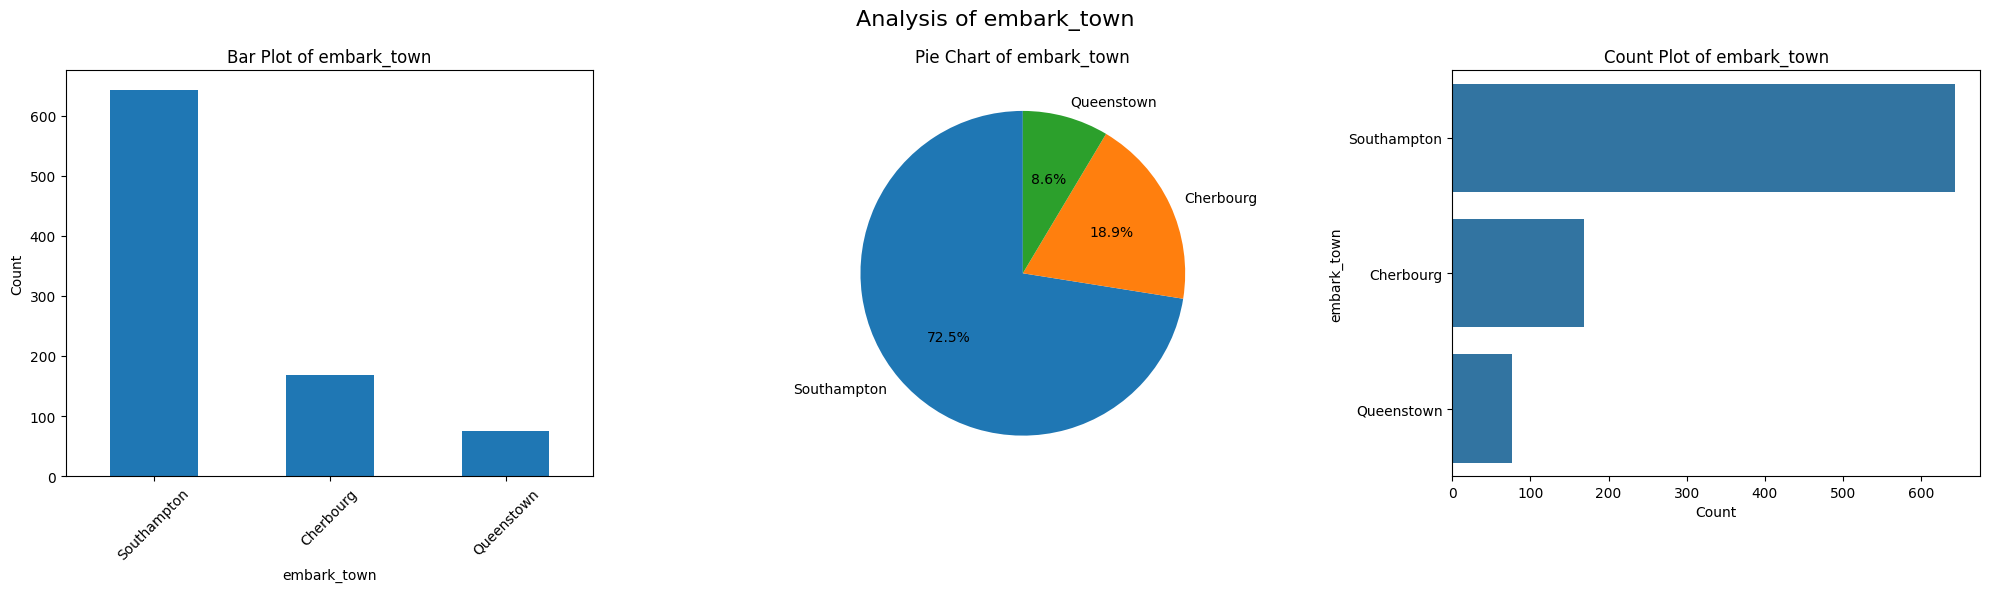

<Figure size 1200x600 with 0 Axes>

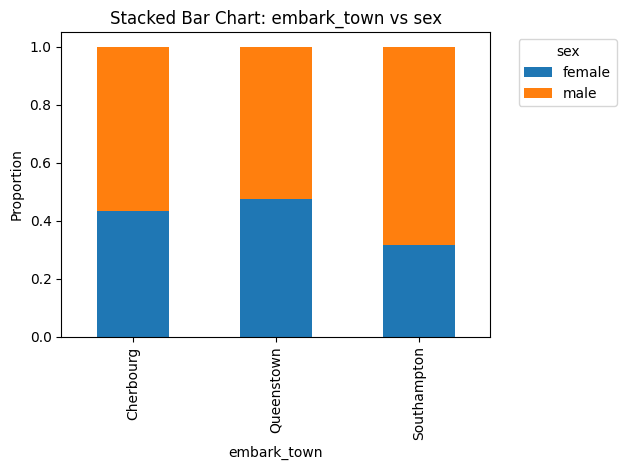

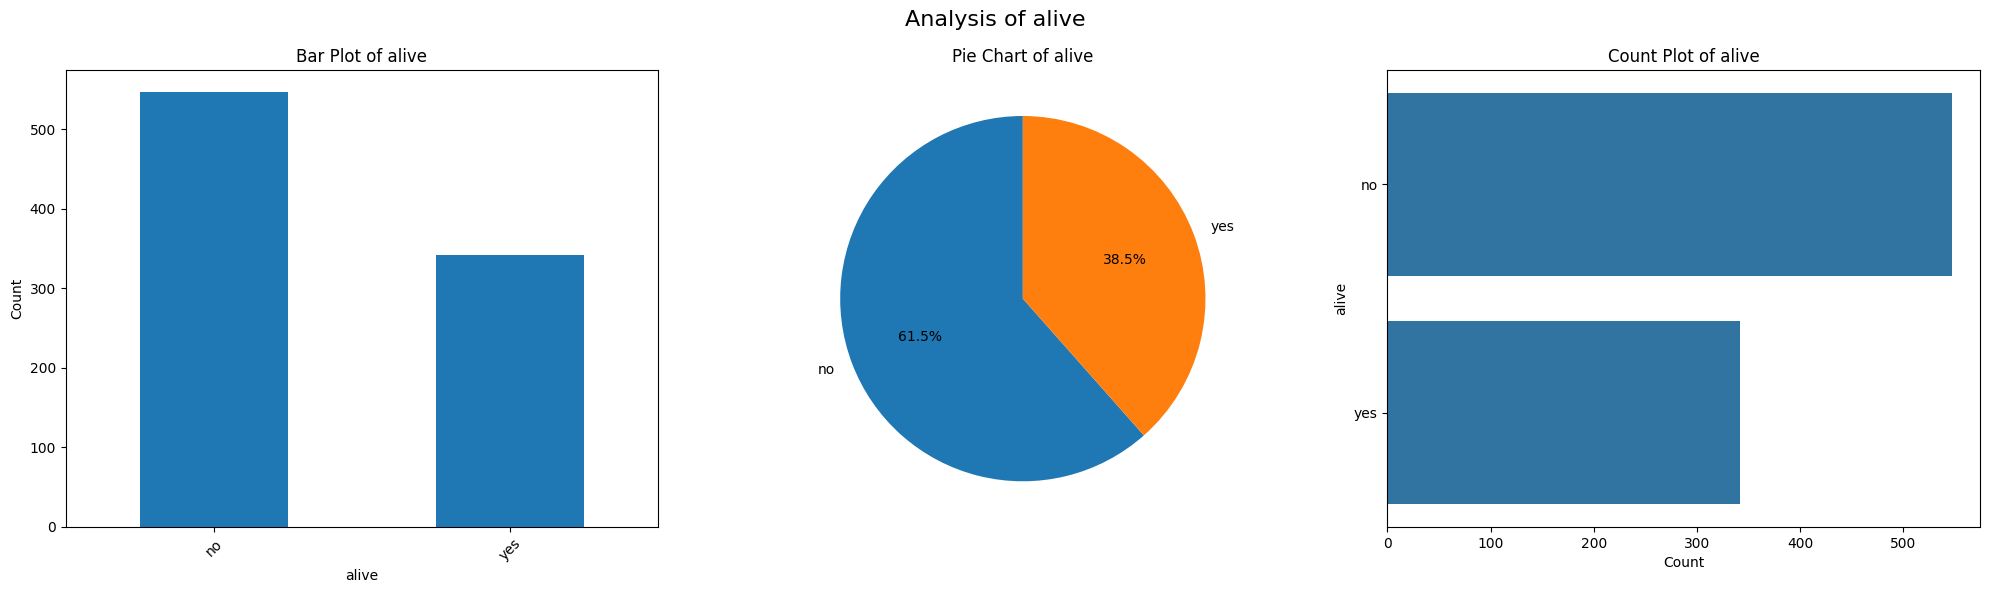

<Figure size 1200x600 with 0 Axes>

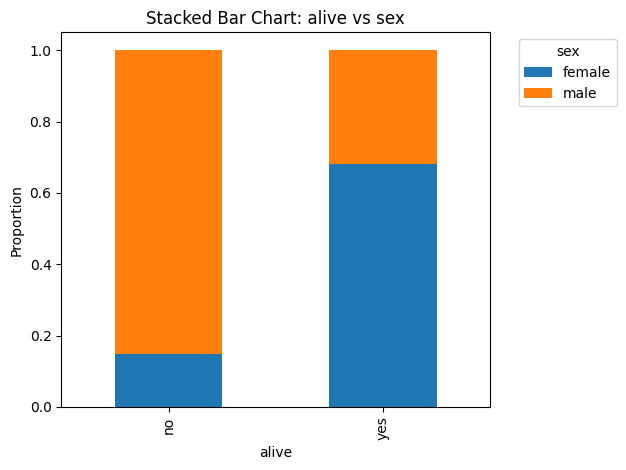

In [14]:
#Data Visualization for Categorical Data
def plot_categorical_columns(df, max_categories=10):
    # Get categorical columns
    cat_columns = df.select_dtypes(include=['object', 'category']).columns

    # Set up the plot style

    for column in cat_columns:
        # Get value counts
        value_counts = df[column].value_counts()
        
        # If there are too many categories, only plot the top max_categories
        if len(value_counts) > max_categories:
            value_counts = value_counts.nlargest(max_categories)
            other_count = df[column].value_counts().sum() - value_counts.sum()
            value_counts['Other'] = other_count

        # Create a figure with 3 subplots
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
        fig.suptitle(f'Analysis of {column}', fontsize=16)

        # Bar plot
        value_counts.plot(kind='bar', ax=ax1)
        ax1.set_title(f'Bar Plot of {column}')
        ax1.set_xlabel(column)
        ax1.set_ylabel('Count')
        ax1.tick_params(axis='x', rotation=45)

        # Pie chart
        ax2.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
        ax2.set_title(f'Pie Chart of {column}')

        # Count plot
        sns.countplot(data=df, y=column, order=value_counts.index, ax=ax3)
        ax3.set_title(f'Count Plot of {column}')
        ax3.set_xlabel('Count')
        ax3.set_ylabel(column)

        plt.tight_layout()
        plt.show()

        # Stacked bar chart (if there's another categorical column)
        other_cat_columns = [col for col in cat_columns if col != column]
        if other_cat_columns:
            other_column = other_cat_columns[0]  # Choose the first other categorical column
            plt.figure(figsize=(12, 6))
            df_crosstab = pd.crosstab(df[column], df[other_column], normalize='index')
            df_crosstab.plot(kind='bar', stacked=True)
            plt.title(f'Stacked Bar Chart: {column} vs {other_column}')
            plt.xlabel(column)
            plt.ylabel('Proportion')
            plt.legend(title=other_column, bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.tight_layout()
            plt.show()
plot_categorical_columns(df)

## 4 Data Cleaning

In [15]:
#check null values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            176
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           686
embark_town      2
alive            0
alone            0
dtype: int64

In [16]:
from scipy import stats
#handle null value

def handle_null_values(df, threshold=0.3):
    """
    Identify and handle null values in the DataFrame.
    
    :param df: Input DataFrame
    :param threshold: Maximum ratio of nulls to total values for imputation (default 0.3)
    :return: DataFrame with null values handled
    """
    
    # Create a copy of the DataFrame to avoid modifying the original
    df_cleaned = df.copy()
    
    # Identify columns with null values
    null_columns = df.columns[df.isnull().any()].tolist()
    
    for column in null_columns:
        null_ratio = df[column].isnull().sum() / len(df)
        
        # If null ratio is above threshold, drop the column
        if null_ratio > threshold:
            print(f"Dropping column '{column}' (null ratio: {null_ratio:.2f})")
            df_cleaned = df_cleaned.drop(column, axis=1)
        else:
            # Determine the data type of the column
            dtype = df[column].dtype
            
            if pd.api.types.is_numeric_dtype(dtype):
                # For numeric data
                if df[column].nunique() / len(df[column].dropna()) < 0.05:
                    # If few unique values, use mode
                    fill_value = df[column].mode()[0]
                    method = "mode"
                elif stats.skew(df[column].dropna()) > 1:
                    # If highly skewed, use median
                    fill_value = df[column].median()
                    method = "median"
                else:
                    # Otherwise, use mean
                    fill_value = df[column].mean()
                    method = "mean"
                
                df_cleaned[column] = df_cleaned[column].fillna(fill_value)
                
            elif pd.api.types.is_string_dtype(dtype):
                # For string data, use mode
                fill_value = df[column].mode()[0]
                method = "mode"
                df_cleaned[column] = df_cleaned[column].fillna(fill_value)
                
            elif pd.api.types.is_datetime64_any_dtype(dtype):
                # For datetime data, use the most frequent day of week and mean time
                day_of_week_mode = df[column].dt.dayofweek.mode()[0]
                mean_time = df[column].dt.time.mean()
                
                def fill_datetime(x):
                    if pd.isnull(x):
                        return pd.Timestamp.combine(
                            pd.Timestamp.now().normalize() + pd.Timedelta(days=day_of_week_mode), 
                            mean_time
                        )
                    return x
                
                df_cleaned[column] = df_cleaned[column].apply(fill_datetime)
                method = "custom datetime"
            
            else:
                # For other types, use mode
                fill_value = df[column].mode()[0]
                method = "mode"
                df_cleaned[column] = df_cleaned[column].fillna(fill_value)
            
            print(f"Filled nulls in '{column}' using {method}")
    
    return df_cleaned

cleaned_data = handle_null_values(df)

Filled nulls in 'age' using mean
Filled nulls in 'embarked' using mode
Dropping column 'deck' (null ratio: 0.77)
Filled nulls in 'embark_town' using mode


This above script does the following:

It defines a function handle_null_values that takes a DataFrame and a threshold as input.
It identifies all columns with null values.
For each column with nulls:
- a. If the ratio of null values to total values is above the threshold, it drops the column.
- b. Otherwise, it chooses a method to fill the nulls based on the data type and characteristics:

For numeric data:

- If there are few unique values (less than 5% of non-null values are unique), it uses the mode.
- If the data is highly skewed (skewness > 1), it uses the median.
- Otherwise, it uses the mean.


For string data:
- it uses the mode (most frequent value).

For datetime data:
- it uses a custom method that combines the most frequent day of the week with the mean time.

For other data types:
- it defaults to using the mode.


It applies the chosen method to fill the null values.
It prints information about what action was taken for each column.

In [17]:
cleaned_data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

## 6 Model Training

In [46]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def train_evaluate_models(X, y, task='classification', test_size=0.2, random_state=42):
    """
    Train and evaluate multiple models, saving evaluation metrics in a DataFrame.
    :param X: Features DataFrame
    :param y: Target Series
    :param task: 'classification' or 'regression'
    :param test_size: Proportion of the dataset to include in the test split
    :param random_state: Random state for reproducibility
    :return: DataFrame with evaluation metrics for all models
    """
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize dictionary to store results
    results = {}
    
    if task == 'classification':
        models = {
            'Logistic Regression': LogisticRegression(random_state=random_state),
            'Decision Tree': DecisionTreeClassifier(random_state=random_state),
            'Random Forest': RandomForestClassifier(random_state=random_state),
            'Gradient Boosting': GradientBoostingClassifier(random_state=random_state),
            'SVM': SVC(random_state=random_state, probability=True),
            'KNN': KNeighborsClassifier()
        }
        
        for name, model in models.items():
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
            
            results[name] = {
                'Accuracy': accuracy_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred, average='weighted'),
                'Recall': recall_score(y_test, y_pred, average='weighted'),
                'F1 Score': f1_score(y_test, y_pred, average='weighted'),
                'ROC AUC': roc_auc_score(y_test, y_pred_proba, average='weighted', multi_class='ovr'),
                'Cross Val Score': np.mean(cross_val_score(model, X, y, cv=5))
            }
    
    elif task == 'regression':
        models = {
            'Linear Regression': Ridge(random_state=random_state),
            'Lasso': Lasso(random_state=random_state),
            'Decision Tree': DecisionTreeRegressor(random_state=random_state),
            'Random Forest': RandomForestRegressor(random_state=random_state),
            'Gradient Boosting': GradientBoostingRegressor(random_state=random_state),
            'SVR': SVR(),
            'KNN': KNeighborsRegressor()
        }
        
        for name, model in models.items():
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            
            results[name] = {
                'MSE': mean_squared_error(y_test, y_pred),
                'MAE': mean_absolute_error(y_test, y_pred),
                'R2 Score': r2_score(y_test, y_pred),
                'Cross Val Score': np.mean(cross_val_score(model, X, y, cv=5, scoring='r2'))
            }
    
    else:
        raise ValueError("Invalid task. Choose 'classification' or 'regression'.")
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results).T
    results_df = results_df.sort_values('Cross Val Score', ascending=False)
    
    return results_df


# For classification:
results_classification = train_evaluate_models(features, target, task='classification')
print(results_classification)
# 
# For regression:
# results_regression = train_evaluate_models(X, y, task='regression')
# print(results_regression)

NameError: name 'features' is not defined